In [10]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [12]:
data=pd.read_csv('Google_train_data.csv')

In [13]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [14]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [15]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [16]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [17]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [18]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 18s - loss: 0.0388 - 18s/epoch - 522ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0117 - 7s/epoch - 196ms/step
Epoch 3/20
35/35 - 9s - loss: 0.0097 - 9s/epoch - 249ms/step
Epoch 4/20
35/35 - 9s - loss: 0.0082 - 9s/epoch - 270ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0097 - 8s/epoch - 216ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0076 - 7s/epoch - 209ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0075 - 7s/epoch - 195ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 213ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0061 - 7s/epoch - 197ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0056 - 7s/epoch - 195ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0062 - 7s/epoch - 197ms/step
Epoch 12/20
35/35 - 9s - loss: 0.0054 - 9s/epoch - 245ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0056 - 7s/epoch - 197ms/step
Epoch 14/20
35/35 - 9s - loss: 0.0053 - 9s/epoch - 254ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0050 - 7s/epoch - 196ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0052 - 7s/epoch - 197ms/step
Epoch 17/20
35/

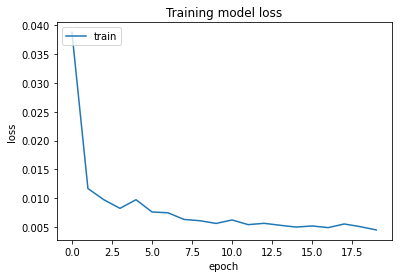

In [19]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [20]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [26]:
y_pred = model.predict(X_test)
#y_pred

6/6 [==============================] - 0s 64ms/step


In [22]:
predicted_price = sc.inverse_transform(y_pred)

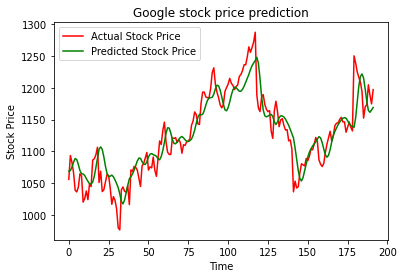

In [23]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()